In [1]:
import glob
glob.glob("*.log")

['NCE.log',
 'ID.log',
 'ID_NCE_FD-kmeans-nmi.log',
 'ID_NCE_FD-kmeans-acc-nmi-ari.log',
 'ID_NCE_FD.log',
 'ID_NCE_FD-ndiv.log',
 'ID_CE_FD.log']

In [2]:
metrics = {}
accs= {}

for path in glob.glob("*.log"):
    with open(path) as f:
        lines = f.readlines()
    results = [[float(i) for i in line.split()[1:]] for line in lines if 'epoch_result' in line]
    name = path.split('.')[0]
    accs[name] = [i[0] for i in results]
    if len(results[0]) >= 3:
        metric = {}
        metric['acc'] = accs[name]
        metric['nmi'] = [i[1] for i in results]
        metric['ari'] = [i[2] for i in results]
        metrics[name] = metric

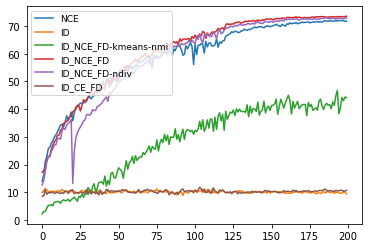

In [3]:
import matplotlib.pyplot as plt

for key in accs.keys():
    if len(accs[key]) > 300:
        continue
    plt.plot(accs[key], label=key)
plt.legend(loc=2, fontsize=9)
plt.show()

In [4]:
for key in accs.keys():
    print(f'{key} max: {max(accs[key])}')

NCE max: 72.03
ID max: 11.36
ID_NCE_FD-kmeans-nmi max: 46.775
ID_NCE_FD-kmeans-acc-nmi-ari max: 0.689
ID_NCE_FD max: 73.55
ID_NCE_FD-ndiv max: 73.08
ID_CE_FD max: 11.81


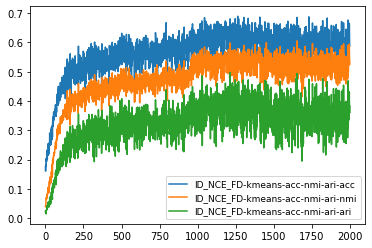

In [5]:
for key in metrics.keys():
    for metric in ['acc', 'nmi', 'ari']:
        plt.plot(metrics[key][metric], label=f'{key}-{metric}')
    plt.legend(loc=4, fontsize=9)
    plt.show()